In [22]:
import pandas as pd # Importamos las librerías que vamos a necesitar o podemos necesitar
pd.set_option('display.max_columns', None)  # me muestre todas las columnas
import numpy as np
import warnings
warnings.filterwarnings('ignore')   # Para quitar los warnings
import matplotlib.pyplot as plt
import pylab as plt # para "pintar"
import seaborn as sns

In [20]:
from scipy.stats import f_oneway
from scipy.stats import kruskal

In [16]:
# from scipy.stats import f_two_way --> No chuta, ya no está disponible.

In [5]:
pokenova = pd.read_csv('../data/pokefinal.csv', encoding = 'ISO-8859-1')

In [7]:
pokenova.tail() # Al cargar el archivo, nos crea una columna "Unnamed: 0" que dropearemos a continuación, y la columna
# number pierde el formado (la dejaremos así, porque no nos afecta).

,Unnamed: 0,number,name,type1,type2,type_combo,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,phy_sweeper,sp_sweeper,wall,phy_tank,sp_tank,compet_rol,category,height,weight,color,gender,hatch,steps,capt_rate,base_happ,base_exp,growth_rate,exp_lvl100,egg_gr1,egg_gr2
1005,1005,1006,Iron Valiant,5,6,Fairy-Fighting,590,74,130,90,120,60,116,9,246,236,224,220,180,phy_sweeper,normal,14,350,white,genderless,50,12800,10,0,295,slow,1250000,No-Eggs,No eggs
1006,1006,1007,Koraidon,6,3,Fighting-Dragon,670,100,135,115,85,100,135,9,270,220,315,250,185,wall,legendary,25,3030,red,genderless,50,12800,3,0,335,slow,1250000,No-Eggs,No eggs
1007,1007,1008,Miraidon,4,3,Electric-Dragon,670,100,85,100,135,115,135,9,220,270,315,185,250,wall,legendary,35,2400,blue,genderless,50,12800,3,0,335,slow,1250000,No-Eggs,No eggs
1008,1008,1009,Walking Wake,18,3,Water-Dragon,590,99,83,91,125,83,109,9,192,234,273,174,208,wall,normal,35,2800,blue,genderless,50,12800,5,0,295,slow,1250000,No-Eggs,No eggs
1009,1009,1010,Iron Leaves,10,15,Grass-Psychic,590,90,130,88,70,108,104,9,234,174,286,218,178,wall,normal,15,1250,green,genderless,50,12800,5,0,295,slow,1250000,No-Eggs,No eggs


In [8]:
# Dropeamos "Unnamed: 0"
pokenova = pokenova.drop(["Unnamed: 0"], axis=1)

pokenova.head() # Arreglado.

,number,name,type1,type2,type_combo,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,phy_sweeper,sp_sweeper,wall,phy_tank,sp_tank,compet_rol,category,height,weight,color,gender,hatch,steps,capt_rate,base_happ,base_exp,growth_rate,exp_lvl100,egg_gr1,egg_gr2
0,1,Bulbasaur,10,14,Grass-Poison,318,45,49,49,65,65,45,1,94,110,159,98,130,wall,starter,7,69,green,both,20,5120,45,50,64,medium-slow,1059860,Monster,Grass
1,2,Ivysaur,10,14,Grass-Poison,405,60,62,63,80,80,60,1,122,140,203,125,160,wall,starter,10,130,green,both,20,5120,45,50,142,medium-slow,1059860,Monster,Grass
2,3,Venusaur,10,14,Grass-Poison,525,80,82,83,100,100,80,1,162,180,263,165,200,wall,starter,20,1000,green,both,20,5120,45,50,263,medium-slow,1059860,Monster,Grass
3,4,Charmander,7,19,Fire,309,39,52,43,60,50,65,1,117,125,132,95,110,wall,starter,6,85,red,both,20,5120,45,50,62,medium-slow,1059860,Monster,Dragon
4,5,Charmeleon,7,19,Fire,405,58,64,58,80,65,80,1,144,160,181,122,145,wall,starter,11,190,red,both,20,5120,45,50,142,medium-slow,1059860,Monster,Dragon


In [9]:
pokenova.shape # Tenemos 1010 registros (Pokémon) y 33 columnas.

(1010, 33)

In [11]:
# Vamos a comenzar con el estudio de ANOVAS; esto es, vamos a testear tres o más muestras. Nuestras muestras van a venir
# determinadas por las distintas generaciones Pokémon.

# Agrupamos los datos por generación:
gr_by_gen = pokenova.groupby('generation')

In [17]:
# Extraemos los datos de velocidad de cada grupo y los pasarmos como argumentos a f_oneway()
f_value, p_value = f_oneway(gr_by_gen.get_group(1)["speed"],
                            gr_by_gen.get_group(2)["speed"],
                            gr_by_gen.get_group(3)["speed"],
                            gr_by_gen.get_group(4)["speed"],
                            gr_by_gen.get_group(5)["speed"],
                            gr_by_gen.get_group(6)["speed"],
                            gr_by_gen.get_group(7)["speed"],
                            gr_by_gen.get_group(8)["speed"],
                            gr_by_gen.get_group(9)["speed"])

 # Cuando se agrupan los datos por generación, la función f_oneway() calcula la media de los datos para cada grupo y 
# utiliza esas medias para realizar la ANOVA.

In [18]:
f_value, p_value

(2.361203542491456, 0.01614182944448283)

In [19]:
# Imprimimos el resultado
if p_value < 0.05:
    print("Hay diferencias significativas en la velocidad entre al menos dos generaciones.")
else:
    print("No hay diferencias significativas en la velocidad entre las generaciones.")

Hay diferencias significativas en la velocidad entre al menos dos generaciones.


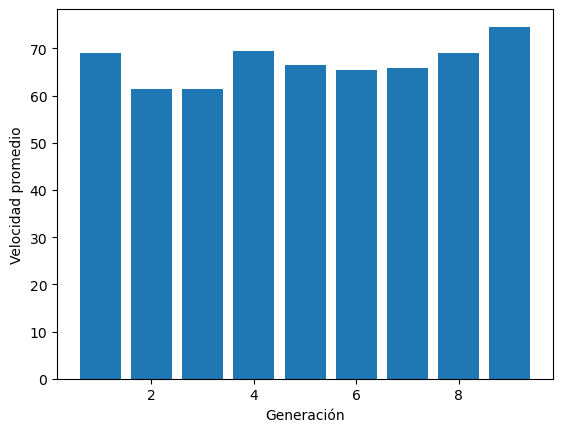

In [24]:
# calcular la velocidad promedio de cada generación
mean_speed = pokenova.groupby("generation")["speed"].mean()

# graficar la velocidad promedio de cada generación
plt.bar(mean_speed.index, mean_speed.values)
plt.xlabel("Generación")
plt.ylabel("Velocidad promedio")
plt.show()

In [21]:
# Vamos a ver qué sucede con Kruskal-Wallis

# Extraemos los datos de velocidad de cada generación:
gen1_speed = pokenova[pokenova["generation"] == 1]["speed"]
gen2_speed = pokenova[pokenova["generation"] == 2]["speed"]
gen3_speed = pokenova[pokenova["generation"] == 3]["speed"]
gen4_speed = pokenova[pokenova["generation"] == 4]["speed"]
gen5_speed = pokenova[pokenova["generation"] == 5]["speed"]
gen6_speed = pokenova[pokenova["generation"] == 6]["speed"]
gen7_speed = pokenova[pokenova["generation"] == 7]["speed"]

# Realizamos la prueba de Kruskal-Wallis:
h_value, p_value = kruskal(gen1_speed, gen2_speed, gen3_speed, gen4_speed, gen5_speed, gen6_speed, gen7_speed)

# Imprimimos el resultado
if p_value < 0.05:
    print("Hay diferencias significativas en la velocidad entre al menos dos generaciones.")
else:
    print("No hay diferencias significativas en la velocidad entre las generaciones.")

No hay diferencias significativas en la velocidad entre las generaciones.


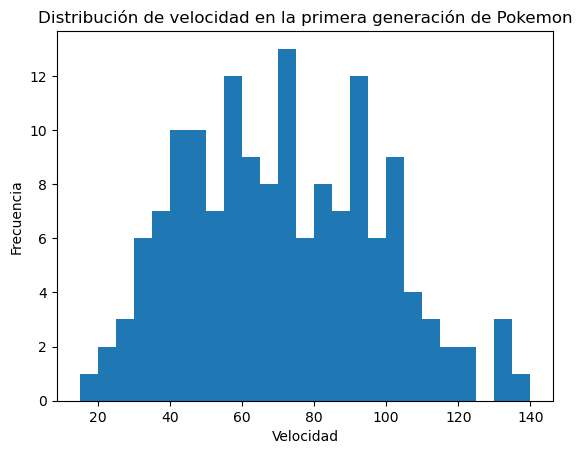

In [34]:
# extraer los datos de velocidad de la primera generación
gen1_speed = pokenova[pokenova["generation"] == 1]["speed"]

# crear un histograma de los datos de velocidad de la primera generación
plt.hist(gen1_speed, bins=25)
plt.xlabel("Velocidad")
plt.ylabel("Frecuencia")
plt.title("Distribución de velocidad en la primera generación de Pokemon")
plt.show()